In [7]:

filename = '20110101_20190515.csv'
filepath = os.path.join(filename)

In [8]:
import torch
# from torch.autograd import Variable # Deprecated
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
dat = pd.read_csv(filepath, encoding='cp949')
dat

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,108,2011-01-01,-6.8,-10.4,154,-2.9,1457.0,NaN,NaN,NaN,...,2.7,6.7,10.0,15.9,17.8,NaN,0.7,NaN,{햇무리}1540-1620. {연무}2025-{연무}{강도0}2100-{연무}{강도...,NaN
1,108,2011-01-02,-5.4,-8.5,621,-1.2,1455.0,NaN,NaN,NaN,...,2.6,6.5,9.7,15.8,17.7,NaN,1.3,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-0610. {박무}06...,NaN
2,108,2011-01-03,-4.5,-8.5,631,-0.3,1525.0,NaN,NaN,NaN,...,2.5,6.4,9.6,15.7,17.7,NaN,0.8,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-0640. {박무}06...,NaN
3,108,2011-01-04,-3.9,-7.4,648,-1.7,1355.0,NaN,NaN,NaN,...,2.5,6.3,9.5,15.6,17.6,NaN,1.4,NaN,-{박무}-0210. {연무}0205-{연무}{강도0}0300-{연무}{강도0}06...,NaN
4,108,2011-01-05,-4.0,-7.7,2353,-1.8,1208.0,NaN,NaN,NaN,...,2.5,6.2,9.4,15.5,17.5,NaN,1.3,NaN,{연무}1030-{연무}{강도0}1200-{연무}{강도0}1500-1640.,NaN
5,108,2011-01-06,-7.6,-9.8,753,-4.6,1607.0,NaN,NaN,NaN,...,2.5,6.2,9.3,15.5,17.6,NaN,1.3,NaN,NaN,NaN
6,108,2011-01-07,-7.0,-10.6,753,-2.9,1502.0,NaN,NaN,NaN,...,2.4,6.1,9.2,15.4,17.5,NaN,0.7,0.0,NaN,NaN
7,108,2011-01-08,-3.6,-8.2,243,0.1,1713.0,3.58,NaN,NaN,...,2.2,5.9,9.1,15.2,17.4,NaN,1.2,0.2,{눈}0850-{눈}{강도0}0900-1015. {눈}1240-1325. {눈}13...,NaN
8,108,2011-01-09,-7.0,-10.3,2247,-0.3,0.0,0.42,NaN,NaN,...,2.3,5.9,9.1,15.2,17.4,NaN,1.5,NaN,-{눈}-0025. -{박무}-0215. {연무}0210-{연무}{강도0}0300-...,NaN
9,108,2011-01-10,-8.2,-11.8,538,-4.6,1443.0,NaN,NaN,NaN,...,2.1,5.8,8.9,15.1,17.4,NaN,1.3,0.1,NaN,NaN


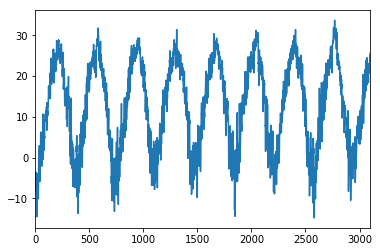

In [10]:
# 8.5년
temp = dat['평균기온(°C)']

temp.plot()
plt.show()

In [11]:
# 8.5년
train_x = temp[:int(365*6.5)]
test_x = temp[int(365*6.5):]

train_x = np.array(train_x)
test_x = np.array(test_x)

In [12]:
len(train_x), len(test_x)

(2372, 726)

In [13]:
ATTR_SIZE = 180 # 윈도우 폭

tmp=[]
train_X = []

for i in range(0, len(train_x) - ATTR_SIZE):
    tmp.append(train_x[i:i+ATTR_SIZE]) ## 윈도우 폭만큼 데이터 저장.

train_X = np.array(tmp)
df = pd.DataFrame(train_X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-6.8,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,...,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0
1,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,...,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8
2,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,...,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1
3,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,...,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7
4,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,...,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6
